In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
#csv summarizing parameters of TOIs derived from ariadne + TICv8
data = pd.read_csv('TOI_InitialResults.csv')

Radius:

In [16]:
#ariadne radii
ariadne_rad_initial = data['ARIADNE_Radius'] #includes nans where stars were skipped
ariadne_rad = np.nan_to_num(ariadne_rad_initial) #makes nans zero
ariadne_rad_err_up = data['ARIADNE_rad_upper']
ariadne_rad_err_low = data['ARIADNE_rad_lower']

#published radii from TIC
tic_rad = data['TICv8_Radius']
tic_rad_err = data['TICv8_Radius_err']

Teff:

In [17]:
#ariadne teff
ariadne_teff_initial = data['ARIADNE_Teff']
ariadne_teff = np.nan_to_num(ariadne_teff_initial) #in case some stars haven't been run/have been skipped
ariadne_teff_upper = data['ARIADNE_teff_upper']
ariadne_teff_lower = data['ARIADNE_teff_lower']

#published teff from TIC
pub_teff = data['TICv8_Teff']
pub_teff_err = data['TICv8_Teff_err']

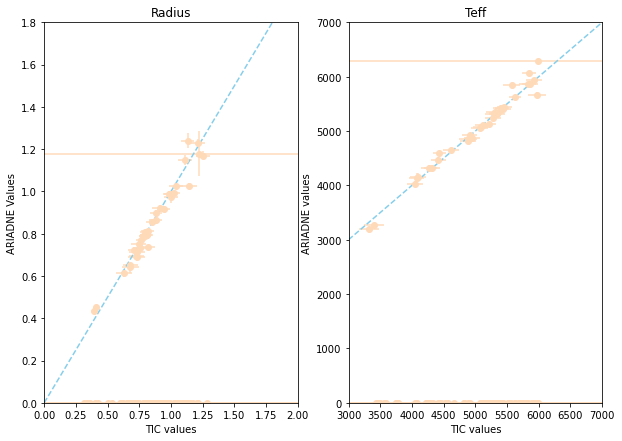

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,7))

#radiusc
ax1.plot([0,2],[0,2],'--',color='skyblue')
ax1.errorbar(tic_rad, ariadne_rad, yerr=[ariadne_rad_err_up,ariadne_rad_err_low], xerr=tic_rad_err, fmt='o',color='peachpuff')
ax1.set_title('Radius')
ax1.set(ylabel='ARIADNE Values', xlabel='TIC values')
ax1.set(xlim=[0,2],ylim=[0,1.8])

#teff
ax2.plot([3000,7000],[3000,7000],'--',color='skyblue')
ax2.errorbar(pub_teff, ariadne_teff, yerr=[ariadne_teff_upper,ariadne_teff_lower], xerr=pub_teff_err, fmt='o',color='peachpuff')
ax2.set(ylabel='ARIADNE values', xlabel= 'TIC values')
ax2.set_title('Teff')
ax2.set(xlim=[3000,7000],ylim=[0,7000])

plt.show()